## Exploratory Data Analysis

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# Convert json file into dataframe
df = pd.read_json('logins.json')

In [3]:
# Show first five rows
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
# Display info including column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
# Convert login time to standard units
df['month'] = df['login_time'].dt.month
df['year'] = df['login_time'].dt.year
df['hour'] = df['login_time'].dt.hour
df['minute'] = df['login_time'].dt.minute
df['second'] = df['login_time'].dt.second
df['dayofweek'] = df['login_time'].dt.dayofweek

In [6]:
# Display standard stats of new columns
df.describe()

,month,year,hour,minute,second,dayofweek
count,93142.000000,93142.0,93142.000000,93142.000000,93142.000000,93142.000000
mean,2.424062,1970.0,11.635363,29.801711,29.619033,3.570301
std,0.995154,0.0,7.816792,17.245034,17.319278,1.946072
min,1.000000,1970.0,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1970.0,4.000000,15.000000,15.000000,2.000000
50%,3.000000,1970.0,12.000000,30.000000,30.000000,4.000000
75%,3.000000,1970.0,19.000000,45.000000,45.000000,5.000000
max,4.000000,1970.0,23.000000,59.000000,59.000000,6.000000


In [7]:
# Create column of 15_min_intervals
df['15_min_intervals'] = 4 * df['hour'] + (df['minute']/15).astype(int)

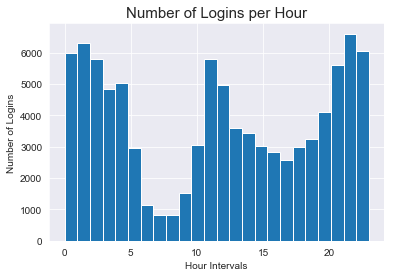

In [8]:
# Set Seaborne style
sns.set_style("darkgrid")

# Create histogram of 15_min_intervals
plt.hist(df['hour'], bins=24, ec='white')
plt.xlabel('Hour Intervals')
plt.ylabel('Number of Logins')
plt.title('Number of Logins per Hour', fontsize=15)
plt.show()

The logins peak at night, between 10pm and 3am. There is also a clear low period between 6 and 9am. Perhaps the data is presented as East Coast Time, but is really West Coast time. Then the peak hours would be between 7pm and midnight, and the low hours between 3am and 6am. This makes more sense.

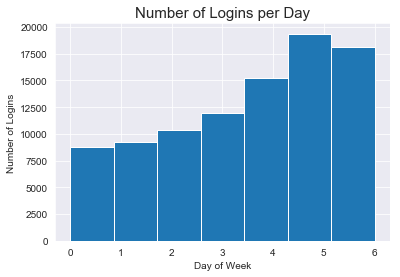

In [9]:
# Create histogram of 1 week intervals
plt.hist(df['dayofweek'], bins=7, ec='white')
plt.xlabel('Day of Week: M-S')
plt.ylabel('Number of Logins')
plt.title('Number of Logins per Day', fontsize=15)
plt.show()

This quite interesting. The number of logins per day continiously increase from Monday until Saturday. Peak days are Saturday, then Sunday, then Friday.

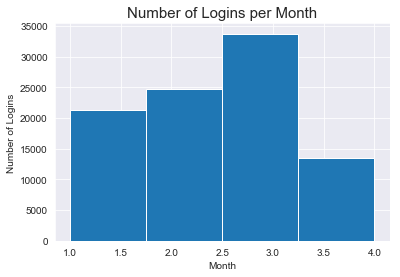

In [11]:
# Create histogram of 1 week intervals
plt.hist(df['month'], bins=4, ec='white')
plt.xlabel('Month')
plt.ylabel('Number of Logins')
plt.title('Number of Logins per Month', fontsize=15)
plt.show()

The number of logins increased per month. The last month is lower because the whole month is not represented.

## Experiment and Metrics Design

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

A measure of success to determine if drivers are using both cities would be to count the number of rides that started in one city, and ended in another.

2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

a. I will first make sure that longitude and latitude can be correctly computed, with the purpose of determining the city of origin and the city of arrival. Next, a period of 30 days will be used as a control to figure out the current number of rides that start in one city and end in another. From here on out, such rides will be referred to as "Transcity". Before implementing the reimbursements, I will make sure that no other significant company changes will be made, and that data on the Transcity rides are stable. If inconsistenties in the Transcity data persits, the 30-day control period can be be extended for another 30 days. (Note: if such a time period is not permissible, half of the drivers may be provided with Transcity reimbursements, and half may continue as is, and the data can be compared; I prefer the original proposal to avoid a perception of bias if other drivers find out.)

b. After 30 days, the experimental data may be compared to the control data. Statistical significance may be determined by running tens of thousands of permutations of the control group to obtain a normal distribution of the number of Transcity rides. I will measure the mean number of Transcity rides per day. If the experimental mean falls within two standard deviations of the control mean, the results will not be statistically significant. If the experimental mean exceeds two standard deviations of the control mean, the results will be statistically significant within a 95% Confidence Interval. Thus the company can be convinced that we are 95% sure that experimental mean is not due to chance alone.

c. Assuming statistical significance, the mean number of Transcity daily rides will have increased due to the toll reimbursement. If the results are not statistically signicant, an increase in the number of rides may be due to chance alone. I will recommend that the city operatons team continue with the policy of reimbursing toll booth fees in order to maintain the increase of Transcity rides only assuming statistical significance. 

One caveat of the proposal put forth is that it does not take profits into account. Since the company will be spending more money on the toll booth reimbursements, it's critical to look at the bottom line. If profits decrease due to the toll reimbursements, it will not be worth it for the company to implement this policy. An additional study will need to be undertaken to determine the net effect on profits. For instance, it could be that reimbursing 50% of the toll booth fees, or some other precentage, will be enough to ensure profits, whereas 100% may not be. The percentage could also be fluid depending on the distance of one's destination from the bridge. Such calculations can be computed by taking into account the profits per Transcity rides from a wide sample space. I would also recommend only undertaking such a study if there is a statistically significant decrease in profits during the experimental run. 

## Predictive Modeling

In [143]:
# Import libraries
import pandas as pd
import json

# Open file
with open('ultimate_data_challenge.json') as f:
   data = json.load(f)

# Create dataframe
dfu = pd.DataFrame(data)

In [144]:
# Show first five entries
dfu.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [145]:
# Show info
dfu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [146]:
# Convert date strings into date-time objects
dfu['last_trip_date'] = pd.to_datetime(dfu['last_trip_date'], errors='ignore')
dfu['signup_date'] = pd.to_datetime(dfu['signup_date'], errors='ignore')

In [147]:
# Verify conversions
dfu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


Ave_rating_by_driver, avg_rating_of_driver and phone are the columns with null values. The mean can be used for the first two.

In [148]:
dfu['avg_rating_by_driver'].fillna((dfu['avg_rating_by_driver'].mean()), inplace=True)
dfu['avg_rating_of_driver'].fillna((dfu['avg_rating_of_driver'].mean()), inplace=True)

In [149]:
dfu['phone'].value_counts(normalize=True)

iPhone     0.697162
Android    0.302838
Name: phone, dtype: float64

In [150]:
dfu.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.445753,0.564977,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [151]:
# Create dataframe of null phone values
df_no_phone = dfu[(dfu['phone']!='iPhone') & (dfu['phone']!='Android')]

# Show first five rows
df_no_phone.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
134,2.88,5.0,5.0,1.00,King's Landing,2014-06-11,None,2014-01-10,0.0,0,False,100.0
176,20.32,5.0,5.0,1.00,Astapor,2014-03-18,None,2014-01-28,0.0,0,False,100.0
320,31.01,5.0,5.0,1.00,Astapor,2014-01-09,None,2014-01-08,0.0,1,False,100.0
349,6.03,5.0,3.3,1.00,Winterfell,2014-06-22,None,2014-01-06,0.0,1,True,33.3
389,3.08,4.8,4.9,1.02,King's Landing,2014-07-01,None,2014-01-26,3.0,5,False,66.7


The none listing is unclear. It could mean that no data was collected, but it could also mean that they don't have an iPhone or Android.

In [152]:
# Transform null phone column into "Unknown" string
dfu['phone'] = dfu.phone.apply(lambda x: x if not pd.isnull(x) else 'Unknown')

In [153]:
# Calculate day of year to find out who took trips in last 30 days
dfu['dayofyear'] = dfu['last_trip_date'].dt.dayofyear

In [154]:
# Write function to determine if user was retained
def user_retained(row):
    if row['dayofyear'] >= 152:
        return 1
    else:
        return 0

# Apply function to new column user_retained    
dfu['user_retained'] = dfu.apply(user_retained, axis=1)

In [155]:
# Show first five rows
dfu.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,dayofyear,user_retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,168,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,125,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,7,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,180,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,74,0


In [156]:
# Convert string columns into numeric columns
import sklearn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for x in dfu.columns:
    if dfu[x].dtypes=='object':
       dfu[x]=le.fit_transform(dfu[x])

In [157]:
# Show correlation matrix between columns and user_retained
corr_matrix = dfu.corr()
corr_matrix['user_retained'].sort_values(ascending=False)

user_retained             1.000000
dayofyear                 0.780837
phone                     0.226405
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
city                      0.066755
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
avg_rating_of_driver     -0.010829
avg_rating_by_driver     -0.026748
avg_dist                 -0.092780
Name: user_retained, dtype: float64

There is a clear positive correlation with users being retained and 3 distinct categories: phones, trips_in_first_30_days and ultimate_black_users. 

There is also a negative correlation between avg_dist and user_retained.

(Note that user_retained depends on dayofyear so the dayofyear correlation should be discarded.)

To investigate the phone correlation, I will creat two histograms, one of users_retained, and one of users not retained.

In [158]:
# Split data frame into user_retained and user_not_retained dataframes
dfu_user_retained = dfu[dfu['user_retained']==1]
dfu_user_not_retained = dfu[dfu['user_retained']==0]

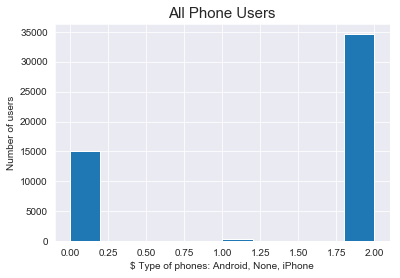

In [159]:
# Setup Seaborn
import seaborn as sns
sns.set_style("darkgrid")

# Create histogram showing number of users
plt.hist(dfu.phone, ec='white')

# Create labels
plt.xlabel('$ Type of phones: Android, None, iPhone')
plt.ylabel('Number of users')
plt.title('All Phone Users', fontsize=15)

# Show graph
plt.show()

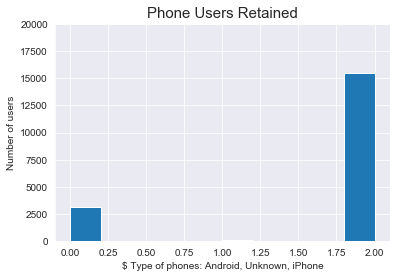

In [160]:
# Create histogram showing number of users
plt.hist(dfu_user_retained.phone, ec='white')

# Create labels
plt.xlabel('Type of phones: Android, Unknown, iPhone')
plt.ylabel('Number of users')
plt.title('Phone Users Retained', fontsize=15)
plt.ylim(0,20000)

# Show graph
plt.show()

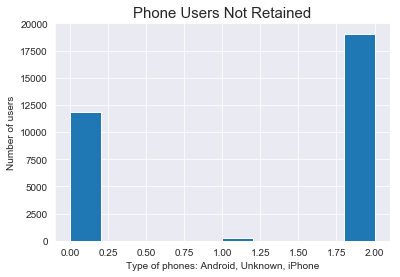

In [161]:
# Create histogram showing number of users
plt.hist(dfu_user_not_retained.phone, ec='white')

# Create labels
plt.xlabel('Type of phones: Android, Unknown, iPhone')
plt.ylabel('Number of users')
plt.title('Phone Users Not Retained', fontsize=15)
plt.ylim(0,20000)


# Show graph
plt.show()

There is a clear negative correlation between Android users and users retained. The same holds for the unknown column. 

## Machine Learning

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [162]:
dfu.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,dayofyear,user_retained
0,3.67,5.0,4.7,1.10,1,2014-06-17,2,2014-01-25,15.4,4,True,46.2,168,1
1,8.26,5.0,5.0,1.00,0,2014-05-05,0,2014-01-29,0.0,0,False,50.0,125,0
2,0.77,5.0,4.3,1.00,0,2014-01-07,2,2014-01-06,0.0,3,False,100.0,7,0
3,2.36,4.9,4.6,1.14,1,2014-06-29,2,2014-01-10,20.0,9,True,80.0,180,1
4,3.13,4.9,4.4,1.19,2,2014-03-15,0,2014-01-27,11.8,14,False,82.4,74,0


In [168]:
X = dfu[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'city', 'phone', 'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct']]

In [169]:
y = dfu['user_retained']

In [180]:
def ml_tests(X, y):
    
    # Split into training and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    #------------------------------------------------------------------------
    
    # NAIVE BAYES
    
    # Create a multinomial classifier
    clf = MultinomialNB()
    
    # Fit the classifier to the data
    clf.fit(X_train, y_train)

    # Print the accuracy
    print("Naive Bayes Multinomial Training CLF score:", clf.score(X_train, y_train))
    print("Naive Bayes Multinomial Test CLF score:", clf.score(X_test, y_test))
    
    # Compute 5-fold cross-validation scores: cv_scores
    cv_scores = cross_val_score(clf, X, y, cv=5)
    
    # Print cross-validation scores
    print('Naive Bayes Multinomial Cross-validation scores:', cv_scores)
    print('Naive Bayes Multinomial Mean cross-validation scores:', np.mean(cv_scores))    
    
    #------------------------------------------------------------------------

    
    # LOGISTIC REGRESSION
    
    # Create the classifier: logreg
    logreg = LogisticRegression()

    # Fit the classifier to the training data
    logreg.fit(X_train, y_train)
    
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = logreg.predict_proba(X_test)[:,1]

    # Compute cross-validated AUC scores: cv_auc
    cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

    # Print list of AUC scores
    print("Logistic Regression AUC cross-validation: {}".format(cv_auc))
    
    print("Logistic Regression AUC cross-validation mean: {}".format(np.mean(cv_auc)))
    
    
    #------------------------------------------------------------------------
    
    # DECISION TREE TUNED
    
    # Setup the parameters and distributions to sample from: param_dist
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

    # Instantiate a Decision Tree classifier: tree
    tree = DecisionTreeClassifier()

    # Instantiate the RandomizedSearchCV object: tree_cv
    tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

    # Fit it to the data
    tree_cv.fit(X,y)

    # Print the tuned parameters and score
    print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
    print("Best Tuned Decision Tree score: {}".format(tree_cv.best_score_))
    
    clf = RandomForestClassifier()

    # Fit the classifier to the data
    clf.fit(X_train, y_train)

    # Print the accuracy
    print("Random Forests Training score:", clf.score(X_train, y_train))
    print("Random Forests Test CLF score:", clf.score(X_test, y_test))
    
    # Compute 5-fold cross-validation scores: cv_scores
    cv_scores = cross_val_score(clf, X, y, cv=5)

    print('Random Forest cv_scores:', cv_scores)
    print('Random Forest cv_mean:', np.mean(cv_scores))

In [181]:
ml_tests(X,y)

Naive Bayes Multinomial Training CLF score: 0.6460533333333334
Naive Bayes Multinomial Test CLF score: 0.65
Naive Bayes Multinomial Cross-validation scores: [0.64543546 0.6486     0.6427     0.6487     0.64216422]
Naive Bayes Multinomial Mean cross-validation scores: 0.6455199345751994
Logistic Regression AUC cross-validation: [0.71277961 0.71359002 0.70474981 0.71697414 0.71926167]
Logistic Regression AUC cross-validation mean: 0.7134710493025315
Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 7}
Best Tuned Decision Tree score: 0.7461
Random Forests Training score: 0.97624
Random Forests Test CLF score: 0.742
Random Forest cv_scores: [0.74112589 0.7468     0.7432     0.7451     0.74347435]
Random Forest cv_mean: 0.7439400469692005


## Conclusion

The best predictors, as mentioned earlier, are trips taken in the first 30 days, ultimate black users, and Android users. I would run further grid searches over multiple hyper-parameters on random forests, decision trees and logistic regression (in addition to deep learning where more data could be useful) before selecting a final model. The current best performing model is a tuned decision tree at 75%. Deep learning would also be worth pursuing with more data.